<CENTER>
    <a href="http://opendata.atlas.cern" class="icons"><img src="../images/opendata-top-transblack.png" style="width:40%"></a>
</CENTER>

# A simple introduction to data analysis in ATLAS: Level 3
Now you know how to apply cuts and fill histograms. In **Level 3** we will work with two different data sets, as we want to **compare the data** in them.

First we import ROOT to read the files in the _.root_ data format.
In order to activate the interactive visualisation of the histogram that is later created we can use the JSROOT magic activated in the second line.

In [1]:
import ROOT
## %jsroot on

Welcome to JupyROOT 6.16/00


Next we open two data file. We call the one "signal_file" and the other "background_file". The ultimate aim is to apply _the same_ cuts on each dataset, and keep as many signal events as we can whilst cutting away as many background events as we can.

In [2]:
signal_file = ROOT.TFile.Open("http://opendata.atlas.cern/release/samples/MC/mc_147770.Zee.root")
background_file = ROOT.TFile.Open("http://opendata.atlas.cern/release/samples/MC/mc_105985.WW.root")
#f = ROOT.TFile.Open("http://opendata.atlas.cern/release/samples/MC/mc_105987.WZ.root")
print "Opened signal file with name ", signal_file.GetName()
print "Opened background file with name ", background_file.GetName()

Opened signal file with name  http://opendata.atlas.cern/release/samples/MC/mc_147770.Zee.root
Opened background file with name  http://opendata.atlas.cern/release/samples/MC/mc_105985.WW.root


After the data is opened we create the canvas on which we we draw the final histogram.

In [3]:
canvas = ROOT.TCanvas("Canvas","my canvas",800,600)

Now we define a "signal" tree and a "background" tree.

In [4]:
signal = signal_file.Get("mini")
background = background_file.Get("mini")

Now we define histograms: one for signal and one for background events. Again we start by looking at the number of leptons.

In [5]:
signal_hist_no_lep = ROOT.TH1F("signal no_lep","Number of leptons",6,-0.5,5.5)
background_hist_no_lep = ROOT.TH1F("background no_lep","Number of leptons",6,-0.5,5.5)

Now we loop through the events in each dataset and apply basic cuts. Remember, if you want to loop through _all_ events, then _comment out_ the line that contains the word **break** in it by inserting a hash (#) at the beginning of that line.
The cuts are again tailored to select Z->ee or Z->mumu events. That is, we want:
1. At least 2 leptons in the event.
2. The first 2 leptons are of the same family.
3. The first 2 leptons have opposite charges.
We start with signal events.

In [7]:
#signal
print "number of total signal events to loop over: ", signal.GetEntries()

count = 0
for i in range(signal.GetEntries()):
    if i >= 1000000: break # use this line to test the loop: this line will make the loop run only over the first 1 million events.
    if i%1000000 == 0: print "at event number ", i # this is so we know where we are as the loop can take a while to execute.
    signal.GetEntry(i)
    count += 1
    
    #1st cut
    if signal.lep_n >= 2:
        # 2nd cut
        if signal.lep_type[0] == signal.lep_type[1]:
            #3rd cut
            if not signal.lep_charge[0] == signal.lep_charge[1]:
                #now we fill the histogram for all events that meet the 3 criteria, or "pass the cuts".
                signal_hist_no_lep.Fill(signal.lep_n)
    
print "Done!"
print "looped over ", count, " signal events."

number of total signal events to loop over:  7500000
at event number  0
at event number  1000000
Done!
looped over  1000001  signal events.


In [8]:
#background
print "number of total background events to loop over: ", background.GetEntries()

count = 0
for i in range(background.GetEntries()):
    if i >= 1000000: break # use this line to test the loop: this line will make the loop run only over the first 1 million events.
    if i%1000000 == 0: print "at event number ", i # this is so we know where we are as the loop can take a while to execute.
    background.GetEntry(i)
    count += 1
    
    #1st cut
    if background.lep_n >= 2:
        # 2nd cut
        if background.lep_type[0] == background.lep_type[1]:
            #3rd cut
            if not background.lep_charge[0] == background.lep_charge[1]:
                #now we fill the histogram for all events that meet the 3 criteria, or "pass the cuts".
                background_hist_no_lep.Fill(background.lep_n)
    
print "Done!"
print "looped over ", count, " background events."

number of total background events to loop over:  7500000
at event number  0
Done!
looped over  500000  background events.


After filling all histogram we want to see the results of the analysis. This time we want to see the histograms filled with signal events overlaid with histograms filled with background events. It is therefore important to set a different for each histogram. We choose red for signal and blue for background. The magic word when drawing the histograms is "SAME"!

In [21]:
#signal is red
signal_hist_no_lep.SetLineColor(ROOT.kRed)
signal_hist_no_lep.SetLineWidth(2) # making line thicker so we can see it better
signal_hist_no_lep.Draw()
#background is blue
background_hist_no_lep.SetLineColor(ROOT.kBlue)
background_hist_no_lep.SetLineWidth(2) # making line thicker so we can see it better
background_hist_no_lep.Draw("SAME")

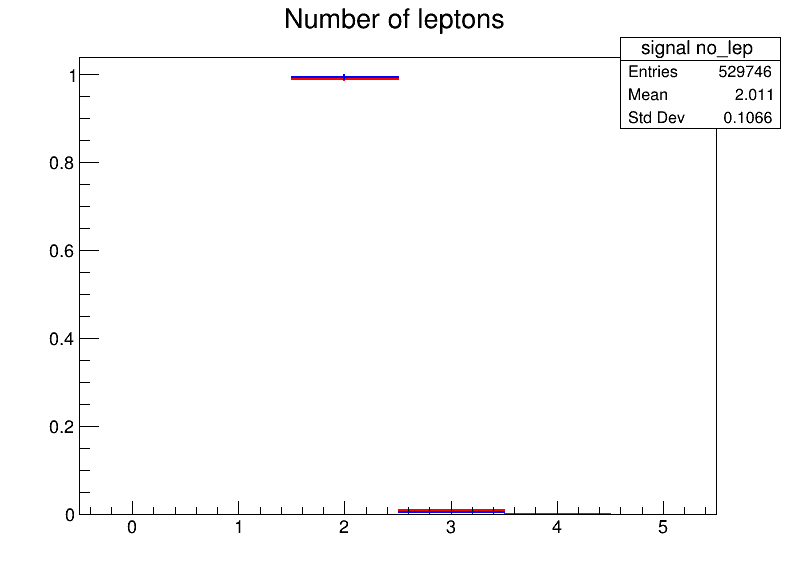

In [22]:
canvas.Draw()

Now we take the same histogram and scale the entries in each bin so that the sum of entries equal 1. This makes it easier to see how large the fraction or percentage of the occurance of a given value is. For example, if the bin with central bin value 1 has 0.45 bin entries, then we know that 45% of our events contain 1 lepton.  

In [18]:
#signal
scale = signal_hist_no_lep.Integral()
signal_hist_no_lep.Scale(1/scale)
#background
scale = background_hist_no_lep.Integral()
background_hist_no_lep.Scale(1/scale)

In [19]:
#signal
signal_hist_no_lep.Draw()
#background
background_hist_no_lep.Draw("SAME")

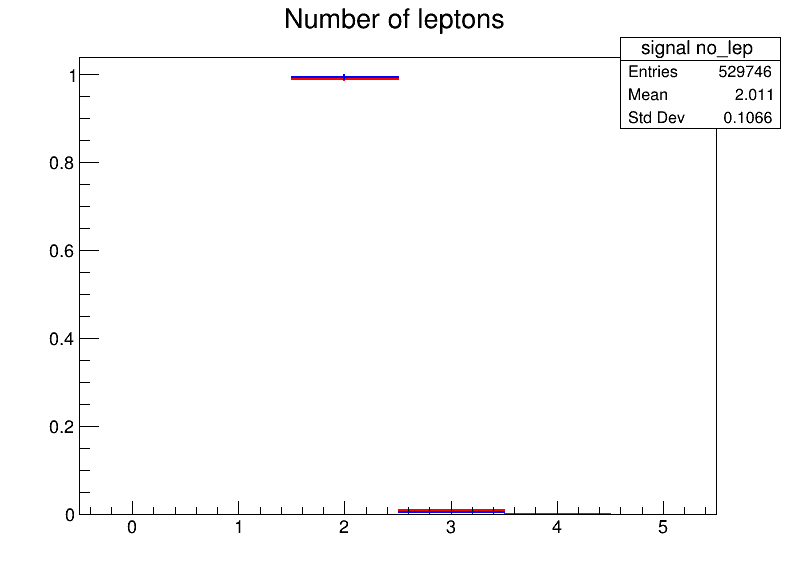

In [20]:
canvas.Draw()